In [61]:
import pandas as pd
import re
import seaborn as sns
import scipy.stats as stats

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [62]:
#Import IQMs
iqms_df=pd.read_csv('group_T1w.tsv',sep='\t')

#Drop non-IQMs columns
iqms_df.drop(['spacing_x','spacing_y','spacing_z','size_x','size_y','size_z'], inplace=True, axis=1)

print(iqms_df.keys())
len(iqms_df.keys())

Index(['bids_name', 'cjv', 'cnr', 'efc', 'fber', 'fwhm_avg', 'fwhm_x',
       'fwhm_y', 'fwhm_z', 'icvs_csf', 'icvs_gm', 'icvs_wm', 'inu_med',
       'inu_range', 'qi_1', 'qi_2', 'rpve_csf', 'rpve_gm', 'rpve_wm',
       'snr_csf', 'snr_gm', 'snr_total', 'snr_wm', 'snrd_csf', 'snrd_gm',
       'snrd_total', 'snrd_wm', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_csf_k',
       'summary_csf_mad', 'summary_csf_mean', 'summary_csf_median',
       'summary_csf_n', 'summary_csf_p05', 'summary_csf_p95',
       'summary_csf_stdv', 'summary_gm_k', 'summary_gm_mad', 'summary_gm_mean',
       'summary_gm_median', 'summary_gm_n', 'summary_gm_p05', 'summary_gm_p95',
       'summary_gm_stdv', 'summary_wm_k', 'summary_wm_mad', 'summary_wm_mean',
       'summary_wm_median', 'summary_wm_n', 'summary_wm_p05', 'summary_wm_p95',
       'summary_wm_stdv', 'tpm_overlap_csf', 'tpm_overla

63

In [63]:
iqms_df

,bids_name,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,sub-000103_acq-headmotion1_T1w,0.299988,4.634776,0.578398,18125.471826,4.966117,4.62662,5.13781,5.13392,0.188436,...,1001.098427,1000.032964,217518.0,941.585838,1063.889418,37.597807,0.157654,0.484325,0.524611,0.611658
1,sub-000103_acq-headmotion2_T1w,0.379073,3.567419,0.591603,10699.180305,4.822003,4.46450,4.92740,5.07411,0.177819,...,1005.564428,1000.036824,226444.0,922.140071,1107.370234,57.011027,0.158393,0.468808,0.517117,0.535285
2,sub-000103_acq-standard_T1w,0.280003,4.935162,0.568875,-1.000000,4.929817,4.61245,5.08884,5.08816,0.184937,...,1000.408921,1000.032722,212792.0,945.454510,1056.019616,33.804729,0.162463,0.491216,0.524974,0.611933
3,sub-000148_acq-headmotion1_T1w,0.397614,3.392048,0.583915,5189.463508,4.835817,4.61080,4.87570,5.02095,0.191343,...,1005.229461,1000.066049,190325.0,914.578183,1113.323438,60.740073,0.142841,0.461210,0.506339,0.561052
4,sub-000148_acq-headmotion2_T1w,0.363886,3.788976,0.581655,10589.201553,4.895777,4.69164,4.93218,5.06351,0.195766,...,1003.432818,1000.062883,191263.0,923.258255,1095.094469,52.521587,0.139089,0.465189,0.509817,0.590518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,sub-992121_acq-headmotion2_T1w,0.320649,4.234433,0.601149,10492.782890,4.983890,4.78491,5.10830,5.05846,0.233095,...,1000.838892,1000.037020,219880.0,927.368946,1076.701098,45.754330,0.164818,0.466935,0.501009,0.510034
432,sub-992121_acq-standard_T1w,0.282178,4.857346,0.588673,-1.000000,5.177317,4.99272,5.36553,5.17370,0.244409,...,1000.207879,1000.034758,208816.0,946.491288,1054.274049,32.734037,0.165528,0.479209,0.504383,0.542826
433,sub-992238_acq-headmotion1_T1w,0.336161,4.059215,0.567219,17814.720026,5.059083,4.76806,5.20855,5.20064,0.207613,...,1003.643158,1000.051082,220464.0,922.578202,1097.051723,53.334013,0.158515,0.462662,0.515357,0.684547
434,sub-992238_acq-headmotion2_T1w,0.406557,3.250684,0.583295,13907.615934,4.900820,4.61689,4.97815,5.10742,0.193325,...,1006.411624,1000.027604,219301.0,902.643845,1133.381193,70.818452,0.158532,0.445762,0.496410,0.632699


In [49]:
#Load expert manual ratings 
ratings_df=pd.read_csv('scores.tsv',sep='\t')
ratings_df

#Extract motion condition and manual ratings in the same order as the iqms df
ratings = []
motion_condition = []
for _, row in iqms_df.iterrows():
    sub_name = row['bids_name']
    ratings.append(ratings_df.loc[ratings_df['bids_name'] == sub_name, 'score'].item())
    
    patt = re.compile(r"acq-(.*?)_T1w")
    m = patt.search(sub_name)
    if m:
        motion_condition.append(m.group(1))

ratings_df_reordered = pd.DataFrame(ratings, columns = ['ratings'])
motion_condition_df = pd.DataFrame(motion_condition, columns = ['motion_condition'])
full_df = pd.concat([iqms_df, ratings_df_reordered, motion_condition_df], axis=1)

(62,)


[Text(0.5, 1.0, 'IQMs T-SNE projection')]

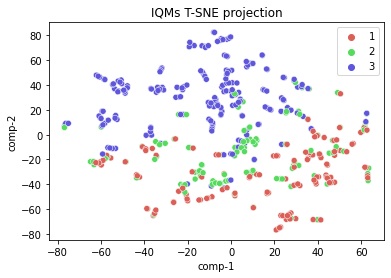

In [46]:
#Drop subject name
iqms = iqms_df.drop('bids_name', inplace=False, axis=1).to_numpy()
#Standardize data
iqms = StandardScaler().fit_transform(iqms)
#Each IQMs has a zero mean across subjects
print(iqms.mean(axis=0).shape)

#Run TSNE
iqms_embedded = TSNE(n_components=2, learning_rate='auto', init='random' , perplexity=3).fit_transform(iqms)

#Plot TSNE
df = pd.DataFrame()
df["target"] = ratings
df["comp-1"] = iqms_embedded[:,0]
df["comp-2"] = iqms_embedded[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.target.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="IQMs T-SNE projection")